In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_voxels(voxels):
    ax = plt.figure().add_subplot(projection='3d')
    ax.voxels(voxels, edgecolor='k')
    print(voxels.shape)
    plt.show()

In [3]:
from src.models.joint_graph_model import LegoNet
from src.sequential_dataset import SequentialLegoDataJointGraph, LegoToUndirected

ds = SequentialLegoDataJointGraph("../data", 'train', 1000, LegoToUndirected(), random_order=True, repeat=5)



len ds: 860
torch.Size([8, 14, 6])


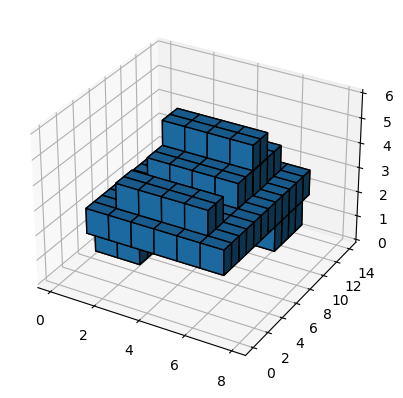

HeteroData(
  lego={
    x=[11, 2],
    y=[1, 6],
    pos=[11, 6]
  },
  point={ pos=[1000, 3] },
  (lego, to, lego)={
    edge_index=[2, 25],
    edge_attr=[25, 2]
  },
  (point, to, point)={ edge_index=[2, 6000] },
  (lego, to, point)={ edge_index=[2, 11000] },
  (point, to, lego)={ edge_index=[2, 11000] }
)
HeteroData(
  lego={
    x=[12, 2],
    y=[1, 6],
    pos=[12, 6]
  },
  point={ pos=[1000, 3] },
  (lego, to, lego)={
    edge_index=[2, 29],
    edge_attr=[29, 2]
  },
  (point, to, point)={ edge_index=[2, 6000] },
  (lego, to, point)={ edge_index=[2, 12000] },
  (point, to, lego)={ edge_index=[2, 12000] }
)
HeteroData(
  lego={
    x=[13, 2],
    y=[1, 6],
    pos=[13, 6]
  },
  point={ pos=[1000, 3] },
  (lego, to, lego)={
    edge_index=[2, 32],
    edge_attr=[32, 2]
  },
  (point, to, point)={ edge_index=[2, 6000] },
  (lego, to, point)={ edge_index=[2, 13000] },
  (point, to, lego)={ edge_index=[2, 13000] }
)
Invalid piece placement; terminate generation
Generated 3 steps


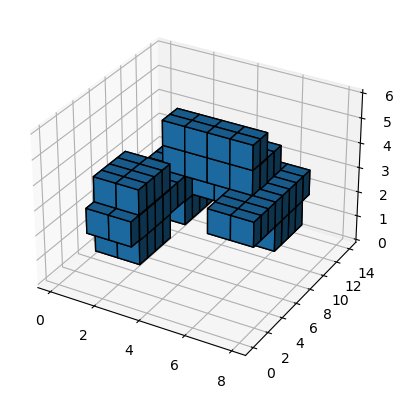

In [29]:
from src.sequential_dataset import pad_voxels_to_shape
from src.lego_model import LegoModel
i = 9
voxels = LegoModel.to_voxels(ds[i]['lego'])
print(f"len ds: {len(ds)}")
plot_voxels(voxels)

net = LegoNet.load_from_checkpoint("../lightning_logs/version_0/checkpoints/epoch=29-step=210.ckpt")
net.eval()
gen_model, batch = net.generate_single_lego_model(current_model=ds[i], keep_seq=True, transform=LegoToUndirected())

from src.lego_model import LegoModel

gen_voxels = LegoModel.to_voxels(gen_model['lego'])
plot_voxels(gen_voxels)

In [38]:
from src.sequential_dataset import SequentialLegoDataJointGraph, LegoToUndirected
from torch_geometric.loader import DataLoader

net = LegoNet.load_from_checkpoint("../lightning_logs/version_13/checkpoints/epoch=89-step=180.ckpt")
ds = SequentialLegoDataJointGraph("../data/", 'train', 100, LegoToUndirected())
net.eval()
loader = DataLoader(ds)
correct = 0
for g in loader:
    if net.gen_step(g, 1, 'train'):
        correct += 1
    else:
        print(g['lego'].num_nodes)

/Users/jacknugent/mambaforge/envs/lego/lib/python3.10/site-packages/lightning/pytorch/core/module.py:407: UserWarning: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`
  rank_zero_warn(


6
4
20
25
29
30
41
45
54
58
59
60
61
62
63
64
66
73
74
76
1
17
32
58
60


In [39]:
correct / len(loader)

0.8546511627906976